In [1]:
 #import sys
 #!{sys.executable} -m pip install textblob

In [2]:
import os
import nltk as nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
import re
from nltk.stem import WordNetLemmatizer
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from textblob import TextBlob 
from sklearn.linear_model import LogisticRegression
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn import metrics
# TfidfVectorizer is vectorizer + encoder
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
from scipy import stats
import pingouin as pg
warnings.filterwarnings('ignore')
from collections import defaultdict



#### Lower Case Conversion ####
 bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life , such as `` teachers '' . my 35 years in the teaching profession lead me to believe that bromwell high 's satire is much closer to reality than is `` teachers '' . the scramble to survive financially , the insightful students who can see right through their pathetic teachers ' pomp , the pettiness of the whole situation , all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school , i immediately recalled ......... at .......... high . a classic line : inspector : i 'm here to sack one of your teachers . student : welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it is n't !

 #### Removing Special Characters ####
 bromwell high is a cartoon comedy it ran at the same time as some other programs about sch

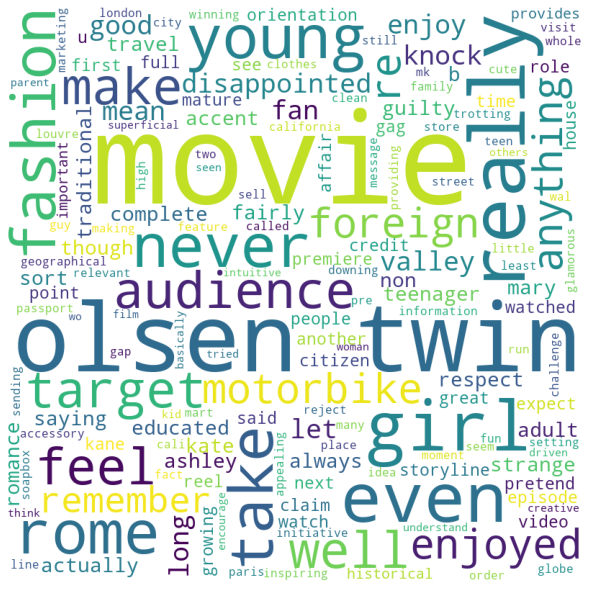

In [3]:
df_movie_review_pos = pd.DataFrame()
df_movie_review_neg = pd.DataFrame()
df_textblob_polarity = pd.DataFrame()
df_vader_score = pd.DataFrame()




def preprocess_review_data(review_type):
    review_remove_punc_list = []
    lemmatizer = WordNetLemmatizer()
    list_fileNames = []
    list_all_files_contents = []
    print_total_File_Name = []
    
    list_names_of_Files = []

    print_review = True
    if review_type == "pos":
        file_path = r'train/pos'''

    else:
        file_path = r'train/neg'''

    stop_words = ['ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once',
                  'during', 'br', 'out', 'very', 'having', 'm', 'with', 'they', 'own', 'an', 'be', 'some',
                  'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is',
                  's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below',
                  'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more',
                  'himself', 'this', 'down', 'should', 'our', 'their', 've', 'while', 'above', 'both', 'up',
                  'to', 'ours', 'had', 'she', 'all', 'when', 'at', 'any', 'before', 'them', 'same',
                  'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because',
                  'what', 'over', 'why', 'so', 'can', 'did', 'now', 'under', 'he', 'you', 'herself',
                  'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few',
                  'whom', 't', 'n', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how',
                  'further', 'was', 'here', 'than']

    # List all The Files in Directory
    list_All_FILES = os.listdir(file_path)
    


    '''
     Loop through all files and Sort them in Ascending Order
     Store the First number of File names in New List (list_names_of_Files)
    '''

    for i in list_All_FILES:
        number = int(i.split('_')[0].split('.')[0])
        list_names_of_Files.append(number)
        list_names_of_Files.sort()  # [0,1,2,3,4,.....]

    for i in list_names_of_Files:

        # check if the file not been read yet
        if i not in list_fileNames:

            # loop through Original Files names [0_9.txt ,.....]
            for j in list_All_FILES:

                first_character_FileName = int(j.split('_')[0].split('.')[0])

                # Compare First char of Original file with list_names_of_Files
                if first_character_FileName == i:

                    print_total_File_Name.append(j)

                    readFile = open(file_path + '/{}'.format(j), mode='r', encoding="utf8")

                    for line in readFile:

                        # Convert Each word to Lower case then return it as string
                        review_lower_case = ' '.join([w.lower() for w in word_tokenize(line)])

                        if print_review:
                            print("#### Lower Case Conversion ####\n", review_lower_case)

                        # Remove all Special Chars
                        review_remove_special_char = re.sub('\W+', ' ', review_lower_case)
                        if print_review:
                            print("\n #### Removing Special Characters ####\n", review_remove_special_char)

                        # Remove any number
                        review_remove_digits = ''.join(c for c in review_remove_special_char if not c.isdigit())
                        if print_review:
                            print("\n #### Removing Digits ####\n", review_remove_digits)

                        # split line to List of words
                        review_word_tokens = word_tokenize(review_remove_digits)
                        if print_review:
                            print("\n #### Tokenize ####\n", review_word_tokens)

                        # Remove any Stop Words
                        review_remove_stop_words = " ".join([w for w in review_word_tokens if w not in stop_words])
                        if print_review:
                            print("\n #### Removing Stop words ####\n", review_remove_stop_words)

                        # lemmatize Words like parts -> part
                        review_lemmitize = ' '.join([lemmatizer.lemmatize(w) for w in word_tokenize(review_remove_stop_words)])
                        if print_review:
                            print("\n #### Lemmetize Review ####\n", review_lemmitize)

                        # Remove any punctuation
                        review_remove_punc = ''.join(c for c in review_lemmitize if c not in punctuation)
                        if print_review:
                            print("\n #### Removing Puctuations ####\n", review_remove_punc)

                        review_remove_punc_list.append(review_remove_punc)

                        review_list = review_remove_punc.split()
                        if print_review:
                            print("\n #### Final Pre-processed data ####\n", review_list)
                        print_review = False


                        # Store Cleaned String in list.
                        list_all_files_contents.append(review_list)

                        #print(type(list_all_files_contents), list_all_files_contents)

                        # Store all the file which read already. To prevent re-read same files again
                        list_fileNames.append(i)

                        review_sentence = ''.join(review_remove_punc)


    



    if review_type == "pos":
        df_movie_review_pos['File Names'] = print_total_File_Name
        df_movie_review_pos['Reviews'] = review_remove_punc_list
        df_movie_review_pos['Class Label'] = 'Positive'
        df_movie_review_pos['Sentiment'] = 1
        print(df_movie_review_pos)
    else:
        df_movie_review_neg['File Names'] = print_total_File_Name
        df_movie_review_neg['Reviews'] = review_remove_punc_list
        df_movie_review_neg['Class Label'] = 'Negative'
        df_movie_review_neg['Sentiment'] = 0
        print(df_movie_review_neg)

    


  
    wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(review_sentence)
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show() 


preprocess_review_data("pos")







#### Lower Case Conversion ####
 story of a man who has unnatural feelings for a pig . starts out with a opening scene that is a terrific example of absurd comedy . a formal orchestra audience is turned into an insane , violent mob by the crazy chantings of it 's singers . unfortunately it stays absurd the whole time with no general narrative eventually making it just too off putting . even those from the era should be turned off . the cryptic dialogue would make shakespeare seem easy to a third grader . on a technical level it 's better than you might think with some good cinematography by future great vilmos zsigmond . future stars sally kirkland and frederic forrest can be seen briefly .

 #### Removing Special Characters ####
 story of a man who has unnatural feelings for a pig starts out with a opening scene that is a terrific example of absurd comedy a formal orchestra audience is turned into an insane violent mob by the crazy chantings of it s singers unfortunately it stays absu

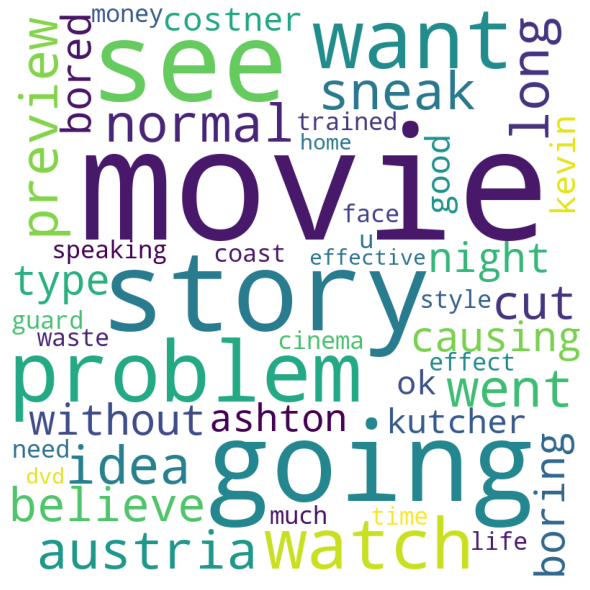

In [4]:
# Preprocessesing Negative Sentiments
preprocess_review_data("neg")


In [8]:

pd.set_option("display.max_rows", None, "display.max_columns", None)
dataFrames = [df_movie_review_pos, df_movie_review_neg]



Total_dataFrameMovieReviews = pd.concat(dataFrames)
Total_dataFrameMovieReviews.reset_index(drop=True, inplace=True)


In [9]:
# ========================================== Spliting Dataset =============================================================#

Total_dataFrameMovieReviews_Reviews_list = Total_dataFrameMovieReviews.Reviews.tolist()
Total_dataFrameMovieReviews_Sentiment_list = Total_dataFrameMovieReviews.Sentiment.tolist()
#print(Total_dataFrameMovieReviews_Reviews_list)


# Split DataSet using simpling function():
X_train ,X_test,y_train,y_test = train_test_split(Total_dataFrameMovieReviews_Reviews_list,Total_dataFrameMovieReviews_Sentiment_list, test_size = 0.3, random_state = 15)



    
#=========================================== Bag Of Words =================================================================#


vector = TfidfVectorizer() # convert data to Matrix
x_train_vector = vector.fit_transform(X_train) # Fit our Train Data
x_test_vector = vector.transform(X_test) # Fit our Test Data




In [33]:

#================================ Accuracy Calculator ==================================#

def accuracy_calculator(data, model_name):
    accuracy = 0
    data_Reviews_list = data.Reviews.tolist()
    data_Sentiment_list = data.Sentiment.tolist() 
      
    
    X_train ,X_test,y_train,y_test = train_test_split(data_Reviews_list,data_Sentiment_list, test_size = 0.3, random_state = 15)
    
    vector = TfidfVectorizer()
    x_train_vector = vector.fit_transform(X_train)
    x_test_vector = vector.transform(X_test)
    
    
    if model_name =='naiveBase':
        naiveBase.fit(x_train_vector, y_train)
        predction  = naiveBase.predict(x_test_vector)
        accuracy = metrics.accuracy_score(y_test, predction)
       
        
    if model_name =='decisionTree':
        decisionTree_f = {'max_depth': [5, 10],'min_samples_split': [2, 4],'min_samples_leaf': [1, 2, 4]}
        decisionClf = GridSearchCV(decisionTree,decisionTree_f, cv=5)
        decisionClf.fit(x_train_vector, y_train)
        predction = decisionClf.predict(x_test_vector)
        accuracy = metrics.accuracy_score(y_test, predction)
    
    
    if model_name =='logisticRegression':
        hyp = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}
        logistic = GridSearchCV(Logistic_Regression, hyp, cv=5)
        logistic.fit(x_train_vector, y_train)
        predction = logistic.predict(x_test_vector)
        accuracy = metrics.accuracy_score(y_test, predction)
    
    if model_name =='Naivebayes_Scratch':
        obj_NaiveBayes=Naivebayes_Scratch() 
        obj_NaiveBayes.train_model(X_train,y_train)
        pred_classes=obj_NaiveBayes.test_Model(X_test) 
        y_test = np.array(y_test)
        accuracy=np.sum(pred_classes==y_test)/float(y_test.shape[0])
    
    if model_name =='TextBlob':

        pol = lambda x: TextBlob(x).sentiment.polarity
        sub = lambda x: TextBlob(x).sentiment.subjectivity
        df_textblob_polarity['polarity'] = data['Reviews'].apply(pol)
        df_textblob_polarity['subjectivity'] = data['Reviews'].apply(sub)
        neg_pred = 0
        pos_pred = 0

        total_pos_neg = 4000

        df_textblob_polarity['Pred']=pd.cut(x = df_textblob_polarity['polarity'],
                                bins = [-1,0,1], 
                                labels = ["Negitive","Positive"])
        for i in range(0,2000):
            if df_textblob_polarity.loc[i,'Pred'] == 'Positive':
                pos_pred = pos_pred + 1
        for i in range(2001,4000):
            if df_textblob_polarity.loc[i,'Pred'] == 'Negitive':
                neg_pred = neg_pred + 1

        total_pred = pos_pred + neg_pred
        accuracy = (total_pred/total_pos_neg)

      
        
        
    if model_name =='vader':
        neg_pred = 0
        pos_pred = 0
        total_pos_neg = 4000
        df_vader_score1=pd.DataFrame()

        sid = SentimentIntensityAnalyzer()
       
        df_vader_score1['scores'] = data['Reviews'].apply(lambda review: sid.polarity_scores(review))
       
        df_vader_score1.head()
        df_vader_score1['compound']  = df_vader_score1['scores'].apply(lambda score_dict: score_dict['compound'])
        
        #print(df_vader_score['compound'])
        df_vader_score1['Pred'] = df_vader_score1['compound'].apply(lambda c: 'Positive' if c >=0 else 'Negitive')

        for i in range(0,1999):
            if df_vader_score1.loc[i,'Pred'] == 'Positive':
                pos_pred = pos_pred + 1
        for i in range(2000,3997):
            if df_vader_score1.loc[i,'Pred'] == 'Negitive':
                neg_pred = neg_pred + 1

        total_pred = pos_pred + neg_pred    
        accuracy = (total_pred/total_pos_neg)
       

    
        
    
    
    return accuracy





# Naive Bayes Classifier 

In [11]:
#=========================================== Naive Base Start =================================================================#

naiveBase = MultinomialNB()
naiveBase.fit(x_train_vector, y_train)
predction  = naiveBase.predict(x_test_vector)

# We need confusion Matrix Here

print("=======Classification Report========")
print(classification_report(y_test, predction))



# ==================================================== Sampling =============================================#

first_sample_pos1 = Total_dataFrameMovieReviews.iloc[0:2000]
first_sample_neg1 = Total_dataFrameMovieReviews.iloc[12500:14500]

first_sample_pos2 = Total_dataFrameMovieReviews.iloc[2001:4000]
first_sample_neg2 = Total_dataFrameMovieReviews.iloc[14501:16500]


first_sample_pos3 = Total_dataFrameMovieReviews.iloc[4001:6000]
first_sample_neg3 = Total_dataFrameMovieReviews.iloc[16501:18500]

first_sample_pos4 = Total_dataFrameMovieReviews.iloc[6000:8000]
first_sample_neg4 = Total_dataFrameMovieReviews.iloc[18501:20500]

first_sample_pos5 = Total_dataFrameMovieReviews.iloc[8001:10000]
first_sample_neg5 = Total_dataFrameMovieReviews.iloc[20501:22500]


dataFrames1 = [first_sample_pos1,first_sample_neg1]
dataFrames2 = [first_sample_pos2,first_sample_neg2]
dataFrames3 = [first_sample_pos3,first_sample_neg3]
dataFrames4 = [first_sample_pos4,first_sample_neg4]
dataFrames5 = [first_sample_pos5,first_sample_neg5]


df_sample1 = pd.concat(dataFrames1)
df_sample1.reset_index(drop=True, inplace=True)



df_sample2 = pd.concat(dataFrames2)
df_sample2.reset_index(drop=True, inplace=True)

df_sample3 = pd.concat(dataFrames3)
df_sample3.reset_index(drop=True, inplace=True)

df_sample4 = pd.concat(dataFrames4)
df_sample4.reset_index(drop=True, inplace=True)

df_sample5 = pd.concat(dataFrames5)
df_sample5.reset_index(drop=True, inplace=True)


naive_list_accuracy =[]


    
# Call function to calc accuracy of different samples (model , DataFrame)
accuracy = accuracy_calculator(df_sample1, 'naiveBase')
naive_list_accuracy.append(accuracy)
accuracy = accuracy_calculator(df_sample2, 'naiveBase')
naive_list_accuracy.append(accuracy)
accuracy = accuracy_calculator(df_sample3, 'naiveBase')
naive_list_accuracy.append(accuracy)
accuracy = accuracy_calculator(df_sample4, 'naiveBase')
naive_list_accuracy.append(accuracy)
accuracy = accuracy_calculator(df_sample4, 'naiveBase')
naive_list_accuracy.append(accuracy)



print("Accuaracy is : ",naive_list_accuracy)





=======Classification Report========
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      3824
           1       0.87      0.86      0.87      3676

    accuracy                           0.87      7500
   macro avg       0.87      0.87      0.87      7500
weighted avg       0.87      0.87      0.87      7500

Accuaracy is :  [0.8783333333333333, 0.91, 0.9075, 0.9041666666666667, 0.9041666666666667]


# Naive Bayes Classifier - Scratch

In [12]:
 #======================================== Naive Base Model Implementation ===================================================#

class Naivebayes_Scratch:
    classes= np.unique(y_train)
            
    def train_model(self,X_train,y_train):
        ALL_words=[]
        
        self.bowDictionary=np.array([defaultdict(lambda:0) for index in range(self.classes.shape[0])])
        if not isinstance(X_train,np.ndarray): X_train=np.array(X_train)
        if not isinstance(y_train,np.ndarray): y_train=np.array(y_train)
            
        for cat_index,cat in enumerate(self.classes):
            all_examples=X_train[y_train==cat] 
            _examples=pd.DataFrame(data=all_examples)
            
            np.apply_along_axis(self.join_Bow,1,_examples,cat_index)
            
        prob=np.empty(self.classes.shape[0])
        word_counts=np.empty(self.classes.shape[0])
        
        for cat_index,cat in enumerate(self.classes):
            prob[cat_index]=np.sum(y_train==cat)/float(y_train.shape[0]) 
            count=list(self.bowDictionary[cat_index].values())
            word_counts[cat_index]=np.sum(np.array(list(self.bowDictionary[cat_index].values())))+1                      
            ALL_words+=self.bowDictionary[cat_index].keys()
                                                     
        self.vocabilary=np.unique(np.array(ALL_words))
        self.vocabilary_length=self.vocabilary.shape[0]                            
        denominator=np.array([word_counts[cat_index]+self.vocabilary_length+1 for cat_index,cat in enumerate(self.classes)])                                                                          
        self.cat_information=[(self.bowDictionary[cat_index],prob[cat_index],denominator[cat_index]) for cat_index,cat in enumerate(self.classes)]                               
        self.cat_information=np.array(self.cat_information)                                 
                                              

    
    
   
    def test_Model(self,test_set): 
        predictions=[] 
        post_=np.empty(self.classes.shape[0])
        
        for example in test_set: 
            _prob=np.zeros(self.classes.shape[0])
            for cat_index,cat in enumerate(self.classes):
                for test_token in example.split():
                    test_token_counts=self.cat_information[cat_index][0].get(test_token,0)+1
                    test_token_prob=test_token_counts/float(self.cat_information[cat_index][2])
                    _prob[cat_index]+=np.log(test_token_prob)
            
            for cat_index,cat in enumerate(self.classes):
                post_[cat_index]=_prob[cat_index]+np.log(self.cat_information[cat_index][1])

            predictions.append(self.classes[np.argmax(post_)])
                
        return np.array(predictions) 
    
    
    
    def join_Bow(self,_examples,cat_index):
        if isinstance(_examples,np.ndarray): 
            _examples=_examples[0]
        for words in _examples.split(): 
            self.bowDictionary[cat_index][words]= self.bowDictionary[cat_index][words] + 1

            
Naivebayes_Scratch_list_accuracy =[]          
               
# Call function to calc accuracy of different samples (model , DataFrame)
accuracy = accuracy_calculator(df_sample1, 'Naivebayes_Scratch')
Naivebayes_Scratch_list_accuracy.append(accuracy)
accuracy = accuracy_calculator(df_sample2, 'Naivebayes_Scratch')
Naivebayes_Scratch_list_accuracy.append(accuracy)
accuracy = accuracy_calculator(df_sample3, 'Naivebayes_Scratch')
Naivebayes_Scratch_list_accuracy.append(accuracy)
accuracy = accuracy_calculator(df_sample4, 'Naivebayes_Scratch')
Naivebayes_Scratch_list_accuracy.append(accuracy)
accuracy = accuracy_calculator(df_sample5, 'Naivebayes_Scratch')
Naivebayes_Scratch_list_accuracy.append(accuracy)


# Printing Accuracy Of NaiveBayes From Scratch
for i in Naivebayes_Scratch_list_accuracy:
    print(i)


0.88
0.9033333333333333
0.8991666666666667
0.9
0.8816666666666667


# Decision Tree Model

In [13]:
#=========================================== Decision Tree Model Start ==================================================#
decisionTree = DecisionTreeClassifier(random_state=15)

decisionTree_f = {'max_depth': [5, 10],'min_samples_split': [2, 4],'min_samples_leaf': [1, 2, 4]}
decisionClf = GridSearchCV(decisionTree,decisionTree_f, cv=5)
decisionClf.fit(x_train_vector, y_train)

print("Best Estimator is: ", decisionClf.best_estimator_)
predction = decisionClf.predict(x_test_vector)

# We need confusion  Matrix Here

print("=======Classification Report========")
print(classification_report(y_test, predction))




DecisionTree_list_accuracy =[]
    
# Call function to calc accuracy of different samples (model , DataFrame)
accuracy = accuracy_calculator(df_sample1, 'decisionTree')
DecisionTree_list_accuracy.append(accuracy)
accuracy = accuracy_calculator(df_sample2, 'decisionTree')
DecisionTree_list_accuracy.append(accuracy)
accuracy = accuracy_calculator(df_sample3, 'decisionTree')
DecisionTree_list_accuracy.append(accuracy)
accuracy = accuracy_calculator(df_sample4, 'decisionTree')
DecisionTree_list_accuracy.append(accuracy)
accuracy = accuracy_calculator(df_sample5, 'decisionTree')
DecisionTree_list_accuracy.append(accuracy)



#print("Accuaracy is : ",DecisionTree_list_accuracy)


for i in DecisionTree_list_accuracy:
    print(i)




Best Estimator is:  DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, random_state=15)
=======Classification Report========
              precision    recall  f1-score   support

           0       0.77      0.66      0.71      3824
           1       0.69      0.79      0.74      3676

    accuracy                           0.73      7500
   macro avg       0.73      0.73      0.73      7500
weighted avg       0.73      0.73      0.73      7500

0.6808333333333333
0.7283333333333334
0.7066666666666667
0.7158333333333333
0.6966666666666667


# Logistic Regression Model

In [14]:
Logistic_Regression = LogisticRegression(random_state=42, max_iter=200)
hyp = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

logistic = GridSearchCV(Logistic_Regression, hyp, cv=5)

logistic.fit(x_train_vector, y_train)
print("Best Estimator is :", logistic.best_estimator_)

predction = logistic.predict(x_test_vector)

print("===================== Classification Report =====================")
print(classification_report(y_test,predction))



Logistic_Regression_list_accuracy =[]

# Call function to calc accuracy of different samples (model , DataFrame)
accuracy = accuracy_calculator(df_sample1, 'logisticRegression')
Logistic_Regression_list_accuracy.append(accuracy)
accuracy = accuracy_calculator(df_sample2, 'logisticRegression')
Logistic_Regression_list_accuracy.append(accuracy)
accuracy = accuracy_calculator(df_sample3, 'logisticRegression')
Logistic_Regression_list_accuracy.append(accuracy)
accuracy = accuracy_calculator(df_sample4, 'logisticRegression')
Logistic_Regression_list_accuracy.append(accuracy)
accuracy = accuracy_calculator(df_sample5, 'logisticRegression')
Logistic_Regression_list_accuracy.append(accuracy)




for i in Logistic_Regression_list_accuracy:
    print(i)



Best Estimator is : LogisticRegression(C=10, max_iter=200, random_state=42)
===================== Classification Report =====================
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      3824
           1       0.87      0.90      0.89      3676

    accuracy                           0.89      7500
   macro avg       0.89      0.89      0.89      7500
weighted avg       0.89      0.89      0.89      7500

0.8983333333333333
0.9183333333333333
0.9091666666666667
0.9108333333333334
0.9025


# Text Blob Model

In [34]:
#=========================================== TEXT BLOB Model Start =================================================================#

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
df_textblob_polarity['polarity'] = Total_dataFrameMovieReviews['Reviews'].apply(pol)
df_textblob_polarity['subjectivity'] = Total_dataFrameMovieReviews['Reviews'].apply(sub)
neg_pred = 0
pos_pred = 0

total_pos_neg = 25000



df_textblob_polarity['Pred']=pd.cut(x = df_textblob_polarity['polarity'],
                        bins = [-1,0,1], 
                        labels = ["Negitive","Positive"])
for i in range(0,12499):
    if df_textblob_polarity.loc[i,'Pred'] == 'Positive':
        pos_pred = pos_pred + 1
for i in range(12499,24999):
    if df_textblob_polarity.loc[i,'Pred'] == 'Negitive':
        neg_pred = neg_pred + 1

total_pred = pos_pred + neg_pred

print("pred:", pos_pred, neg_pred)
print("TEXT BLOB accuracy = {}%".format(total_pred/total_pos_neg))






TEXT_BLOB_Model_list_accuracy =[]

# Call function to calc accuracy of different samples (model , DataFrame)
accuracy = accuracy_calculator(df_sample1, 'TextBlob')
TEXT_BLOB_Model_list_accuracy.append(accuracy)
accuracy = accuracy_calculator(df_sample2, 'TextBlob')
TEXT_BLOB_Model_list_accuracy.append(accuracy)
accuracy = accuracy_calculator(df_sample3, 'TextBlob')
TEXT_BLOB_Model_list_accuracy.append(accuracy)
accuracy = accuracy_calculator(df_sample4, 'TextBlob')
TEXT_BLOB_Model_list_accuracy.append(accuracy)
accuracy = accuracy_calculator(df_sample5, 'TextBlob')
TEXT_BLOB_Model_list_accuracy.append(accuracy)




for i in TEXT_BLOB_Model_list_accuracy:
    print(i)




pred: 11635 5978
TEXT BLOB accuracy = 0.70452%
0.71475
0.71075
0.6915
0.704
0.706


# VADER Model

In [35]:
#=========================================== VADER Model Start =================================================================#

neg_pred = 0
pos_pred = 0
total_pos_neg = 25000

sid = SentimentIntensityAnalyzer()
df_vader_score['scores'] = Total_dataFrameMovieReviews['Reviews'].apply(lambda review: sid.polarity_scores(review))

df_vader_score.head()
df_vader_score['compound']  = df_vader_score['scores'].apply(lambda score_dict: score_dict['compound'])

df_vader_score['Pred'] = df_vader_score['compound'].apply(lambda c: 'Positive' if c >=0 else 'Negitive')

for i in range(0,12499):
    if df_vader_score.loc[i,'Pred'] == 'Positive':
        pos_pred = pos_pred + 1
for i in range(12499,24999):
    if df_vader_score.loc[i,'Pred'] == 'Negitive':
        neg_pred = neg_pred + 1
        
total_pred = pos_pred + neg_pred    

print("pred:", pos_pred, neg_pred)
print("VADER accuracy = {}%".format(total_pred/total_pos_neg))







VADER_Model_list_accuracy =[]

# Call function to calc accuracy of different samples (model , DataFrame)
accuracy = accuracy_calculator(df_sample1, 'vader')
VADER_Model_list_accuracy.append(accuracy)
accuracy = accuracy_calculator(df_sample2, 'vader')
VADER_Model_list_accuracy.append(accuracy)
accuracy = accuracy_calculator(df_sample3, 'vader')
VADER_Model_list_accuracy.append(accuracy)
accuracy = accuracy_calculator(df_sample4, 'vader')
VADER_Model_list_accuracy.append(accuracy)
accuracy = accuracy_calculator(df_sample5, 'vader')
VADER_Model_list_accuracy.append(accuracy)




for i in VADER_Model_list_accuracy:
    print(i)

pred: 10682 6430
VADER accuracy = 0.68448%
0.698
0.69175
0.66925
0.6795
0.6905


In [45]:
#==================== Creating Accuracy dataset for hypothesis testing =================================#

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)


accuracy = pd.DataFrame(list(zip(naive_list_accuracy,Naivebayes_Scratch_list_accuracy, DecisionTree_list_accuracy, Logistic_Regression_list_accuracy,TEXT_BLOB_Model_list_accuracy,VADER_Model_list_accuracy)),
                        columns =['NB','NBScratch', 'DTree', 'LR','TextBlob','Vader'])
print(accuracy)

accuracy.mean(axis=0)


         NB  NBScratch     DTree        LR  TextBlob    Vader
0  0.878333  0.880000   0.680833  0.898333  0.71475   0.69800
1  0.910000  0.903333   0.728333  0.918333  0.71075   0.69175
2  0.907500  0.899167   0.706667  0.909167  0.69150   0.66925
3  0.904167  0.900000   0.715833  0.910833  0.70400   0.67950
4  0.904167  0.881667   0.696667  0.902500  0.70600   0.69050


NB           0.900833
NBScratch    0.892833
DTree        0.705667
LR           0.907833
TextBlob     0.705400
Vader        0.685800
dtype: float64

<AxesSubplot:>

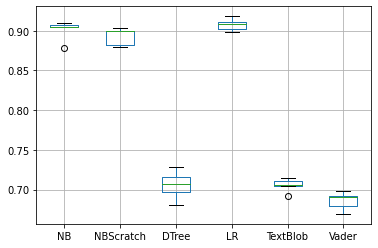

In [46]:

accuracy.boxplot(column=['NB','NBScratch', 'DTree', 'LR','TextBlob','Vader'])


# Hypothesis Testing

In [47]:
#==================== Hypothesis Test between Logistic Regression and Decision Tree =================================#

ttest, pval = stats.ttest_rel(accuracy.iloc[:,3],accuracy.iloc[:,2])
print('Stat test value', ttest)
print('p val:', pval)
if pval<0.05:
    print("Reject Null hypothesis")
else:
    print("Failed to reject Null hypothesis")

Stat test value 42.71285633991471
p val: 1.7961039140796879e-06
Reject Null hypothesis


In [48]:
#==================== Hypothesis Test between Logistic Regression and NaiveBayse - Scratch =================================#

ttest, pval = stats.ttest_rel(accuracy.iloc[:,3],accuracy.iloc[:,1])
print('Stat test value', ttest)
print('p val:', pval)
if pval<0.05:
    print("Reject Null hypothesis")
else:
    print("Failed to reject Null hypothesis")

Stat test value 7.171371656006412
p val: 0.0020018986134918717
Reject Null hypothesis


In [49]:
#==================== Hypothesis Test between Logistic Regression and Naive Base =================================#

ttest, pval = stats.ttest_rel(accuracy.iloc[:,3],accuracy.iloc[:,0])
print('Stat test value', ttest)
print('p val:', pval)
if pval<0.05:
    print("Reject null hypothesis")
else:
    print("Failed to reject null hypothesis")

Stat test value 1.8896693367965594
p val: 0.13180085268217331
Failed to reject null hypothesis


In [50]:
#==================== Hypothesis Test between Logistic Regression and TextBlob =================================#

ttest, pval = stats.ttest_rel(accuracy.iloc[:,3],accuracy.iloc[:,4])
print('Stat test value', ttest)
print('p val:', pval)
if pval<0.05:
    print("Reject null hypothesis")
else:
    print("Failed to reject null hypothesis")

Stat test value 35.01531588651174
p val: 3.969733015860183e-06
Reject null hypothesis


In [51]:
#==================== Hypothesis Test between Logistic Regression and Vader =================================#

ttest, pval = stats.ttest_rel(accuracy.iloc[:,3],accuracy.iloc[:,5])
print('Stat test value', ttest)
print('p val:', pval)
if pval<0.05:
    print("Reject null hypothesis")
else:
    print("Failed to reject null hypothesis")

Stat test value 31.42282657176792
p val: 6.112849068763977e-06
Reject null hypothesis
